<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#План-работы" data-toc-modified-id="План-работы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>План работы</a></span></li><li><span><a href="#Импортируем-библиотеки" data-toc-modified-id="Импортируем-библиотеки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Импортируем библиотеки</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Ознакомимся-с-данными" data-toc-modified-id="Ознакомимся-с-данными-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Ознакомимся с данными</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Разобьем-данные-на-выборки" data-toc-modified-id="Разобьем-данные-на-выборки-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Разобьем данные на выборки</a></span></li><li><span><a href="#Предсказания-линейной-регрессии-в-исходной-задаче" data-toc-modified-id="Предсказания-линейной-регрессии-в-исходной-задаче-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Предсказания линейной регрессии в исходной задаче</a></span></li><li><span><a href="#Предсказания-линейной-регрессии-в-преобразованной-задаче" data-toc-modified-id="Предсказания-линейной-регрессии-в-преобразованной-задаче-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Предсказания линейной регрессии в преобразованной задаче</a></span><ul class="toc-item"><li><span><a href="#Матрица-&quot;a&quot;,-для-преобразования-признаков" data-toc-modified-id="Матрица-&quot;a&quot;,-для-преобразования-признаков-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Матрица "a", для преобразования признаков</a></span></li><li><span><a href="#Преобразуем-признаки" data-toc-modified-id="Преобразуем-признаки-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Преобразуем признаки</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод:</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Описание данных

**Набор данных находится в файле:** insurance.csv

**Признаки**: пол, возраст и зарплата застрахованного, количество членов его семьи.

**Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## План работы

**Загрузим и изучим данные**

**Проведем исследование умножения матриц**

* Перемножим признаки на обратимую матрицу.
* Найдем ответ на вопрос: "Изменится ли качество линейной регрессии?"

**Предложим алгоритм для преобразования данных с целью защиты персональных данных клиентов**

* Обоснуем, почему качество линейной регрессии не поменяется

**Запрограммируем алгоритм преобразования данных**

* Проверим что качество предсказаний линейной регрессии не изменится

## Импортируем библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Загрузка данных

In [ ]:
#Загрузим данные
try:
  data = pd.read_csv('/datasets/insurance.csv', sep = ',')
except:
  data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv', sep = ',')

Устанавливаем начальный RANDOM_STATE для получения одинаковых и повторяющихся результатов вычислений при использования случайных чисел.

In [ ]:
RANDOM_STATE = 12345

### Ознакомимся с данными 

Напишем функцию df_describe для ознакомления с данными в одном датафрейме

In [ ]:
def df_describe(df):
  display('Первые 5 строк данных:\n')
  display(df.head(5))
  
  display('\nИнформация столбцах, их типах:\n')
  df.info()
  
  display('\nОбщее описание данных:\n')
  display(df.describe())
  
  display('\nГистограммы данных:\n')
  df.hist(figsize=(7, 10), bins = 30);
  plt.show()
  
  display('\nВзаимосвязь между величинами:\n')
  fig = px.scatter_matrix(df, labels={
    col: f'{col.replace(" ", "<br>")}' for col in df.columns})
  fig.show()

  display('\nКорреляция между признаками:\n')
  corrMatrix = df.corr()
  display(corrMatrix.style.background_gradient(cmap='coolwarm'))

Первые 5 строк данных:

   Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0    1     41.0   49600.0            1                  0
1    0     46.0   38000.0            1                  1
2    0     29.0   21000.0            0                  0
3    0     21.0   41700.0            2                  0
4    1     28.0   26100.0            0                  0

Информация столбцах, их типах:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB

Общее описание данных:

               Пол      Возраст      Зарплата  Члены семьи  Страховые выплат

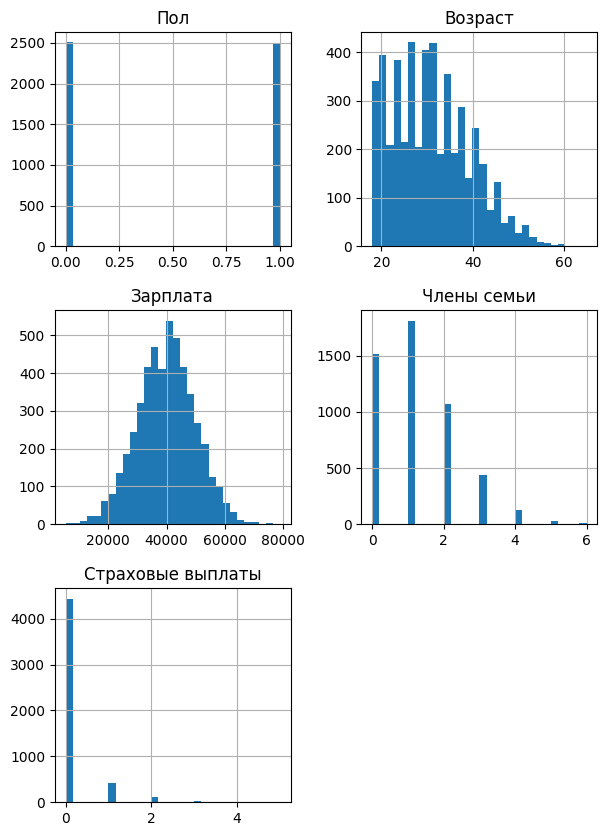


Взаимосвязь между величинами:




Корреляция между признаками:



,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


In [ ]:
df_describe(data)

Изучив данные видим, что в них нет пропусков. Распределение данных соответствует ожидаемым. Можно отметить, что примерно после 40 лет страховые выплаты начинают расти. По остальным параметрам связь между величинами меньше. Она прослеживается, но не в виде линейной зависимости и поэтому видна на графике, но не в корреляции между признаками.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** 
Качество линейной регрессии **не изменится** при умножении признаков на обратимую матрицу.

**Обоснование:**

Умножим признаки $X$ на обратимую матрицу $A$. И получим преобразованную матрицу признаков $X_r$.  То есть $X_r = XA$. В таком случае, веса $w_r$ линейной регрессии для новой преобразованной матрицы $X_r$ будут находиться по следующей формуле
$$ 
w_r = (X_r^TX_r)^{-1} X_r^Ty
$$
Подставим значение $X_r$:
$$
w_r = ((X A)^T (X A))^{-1} (X A)^T y
$$
Раскроем скобки и упростим выражение:
$$
((XA)^T(XA))^{-1}(XA)^T y = 
$$
$$
(A^T X^T X A)^{-1} A^T X^T y = 
$$
$$
(A^T (X^T X) A)^{-1} A^T X^T y = 
$$
$$
A^{-1}(A^T (X^T X))^{-1} A^T X^T y = 
$$
$$
A^{-1}(X^TX)^{-1}(A^T)^{-1} A^T X^T y = 
$$
$$
A^{-1}(X^TX)^{-1}E X^T y = 
$$
$$
A^{-1}(X^TX)^{-1}X^T y
$$
Таким образом, если перемножить матрицу $X$ на обратимую матрицу $A$ тогда веса в линейной регрессии будут находится по следующей формуле:
$$
w_r = A^{-1}(X^T X)^{-1} X^T y
$$
То есть, если матрицу, обратную той на которую мы умножали признаки, умножить на веса линейной регрессии исходной задачи, то получаться веса в преобразованной задаче.

Получаем, что была установлена следующая **связь между параметрами линейной регрессии в исходной задаче и в преобразованной:**
$$
w_r = A^{-1}w
$$


Проверим изменится ли качество линейной регрессии. Подставим преобразованные веса и преобразованные признаки в формулу вычисления предсказаний:
$$
a_r = X_rw_r
$$
Подставим значения признаков X_r и весов w_r:
$$
a_r = XAA^{-1}(X^T X)^{-1} X^T y
$$
$$
a_r = XE(X^T X)^{-1} X^T y
$$
$$
a_r = X(X^T X)^{-1} X^T y
$$
$$
a_r = Xw = a
$$
Таким образом, в преобразованной задаче линейной регрессией будут сделаны те же предсказания что и в исходной задаче.

## Алгоритм преобразования

**Алгоритм**

Чтобы защитить данные будем следовать следующему алгоритму:

1. Сгенерируем случайную матрицу квадратную матрицу с размерностью равной числу признаков в обучающей матрице.
2. Проверим, что сгенерированная случайная матрица обратима. Если получилась необратимая матрица, то возвращаемся к первому пункту и генерируем другую случайную матрицу, иначе переходим к следующему пункту алгоритма.
3. Перемножим матрицу с признаками на случайную обратимую матрицу.

После этого будет сложно восстановить исходную информацию так как, для восстановления данных нужна будет матрица, обратная этой случайной матрице. А подобрать ее перебором будет очень долго (хотя, конечно, если знать какие-то особенности распределения данных в исходной задаче то, может быть, задачу восстановления данных как-то и получится решить)

**Обоснование**

Предложенный ваше алгоритм преобразования исходных данных не изменит качество предсказания линейной регрессии. Так как после преобразования изменятся веса линейной регрессии, но не результат предсказаний модели. Доказательство было приведено выше.

## Проверка алгоритма

### Разобьем данные на выборки

In [ ]:
# Подготовим признаки и целевой признак
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']
 
#Выделим обучающую выборку: 'train' и Валидационную: 'valid'
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=RANDOM_STATE)

# Проверим размер выборок
print(features_train.shape, target_train.shape)
print(features_valid.shape, target_valid.shape)

(3750, 4) (3750,)
(1250, 4) (1250,)


### Предсказания линейной регрессии в исходной задаче

In [ ]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
print('Точность предсказаний линейной регресии на исходной задаче R2:', r2_score(target_valid, predictions))

Точность предсказаний линейной регресии на исходной задаче R2: 0.435227571270266


### Предсказания линейной регрессии в преобразованной задаче

#### Матрица "a", для преобразования признаков

In [ ]:
# Функция генерирует случайную матрицу, проверяет обратимая ли она, если да - возвращает эту матрицу,
# если нет - генерирует новую случайную матрицу
def get_rand_matrix(matrix_size):
    det = 0
    mu, sigma = 0, 0.1 # mean and standard deviation
    # Выполняем цикл, пока не найдем обратимую матрицу
    while det == 0:
        # Генерируем случайную матрицу
        matrix = np.random.normal(mu, sigma, size=(matrix_size, matrix_size))
        # Проверяем, обратима ли матрица
        det = np.linalg.det(matrix)
    return matrix

In [ ]:
# Сгенерируем случайную матрицу "a", с помощью которой будем преобразовывать признаки
np.random.seed(RANDOM_STATE)
mu, sigma = 0, 0.1 # mean and standard deviation
a = get_rand_matrix(features_train.shape[1])
print('Матрица для преобразования признаков:')
print(a)
# Создаем обратную матрицу
a_inv = np.linalg.inv(a)
print('\nОбратная матрица:')
print(a_inv)

Матрица для преобразования признаков:
[[-0.02047077  0.04789433 -0.05194387 -0.05557303]
 [ 0.19657806  0.13934058  0.00929079  0.02817462]
 [ 0.07690226  0.12464347  0.10071894 -0.12962211]
 [ 0.02749916  0.02289129  0.13529168  0.08864293]]

Обратная матрица:
[[-13.11367475   3.92180399   1.88680547  -6.70882866]
 [ 17.58727144   1.41061381  -1.77730453   7.97871271]
 [ -4.17026585  -2.28547676   3.55060202   3.30398187]
 [  5.89129955   1.90730265  -5.54548101   6.25930202]]


#### Преобразуем признаки

In [ ]:
# Перемножим признаки на случайную матрицу "a"
features_r = features @ a

print("Исходные признаки:")
print(features.head())
print("\nПреобразованные признаки:")
print(features_r.head())
 
# Выделим обучающую выборку: 'train' и Валидационную: 'valid'
features_train_r, features_valid_r, target_train_r, target_valid_r = train_test_split(
    features_r, target, test_size=0.25, random_state=RANDOM_STATE)

# Проверим размер выборок
print('\nРазмеры воборок:')
print(features_train_r.shape, target_train_r.shape)
print(features_valid_r.shape, target_valid_r.shape)
print()

Исходные признаки:
   Пол  Возраст  Зарплата  Члены семьи
0    1     41.0   49600.0            1
1    0     46.0   38000.0            1
2    0     29.0   21000.0            0
3    0     21.0   41700.0            2
4    1     28.0   26100.0            0

Преобразованные признаки:
             0            1            2            3
0  3822.418664  6188.100042  4996.123484 -6428.068472
1  2931.355847  4742.884556  3827.882227 -4924.255539
2  1620.648156  2621.553823  2115.367084 -2721.247265
3  3211.007244  5200.604786  4200.445311 -5404.473072
4  2012.632616  3257.144093  2628.972421 -3382.403779

Размеры воборок:
(3750, 4) (3750,)
(1250, 4) (1250,)



Проверим качество модели на преобразованных признаках

In [ ]:
model = LinearRegression()
model.fit(features_train_r, target_train_r)
predictions_r = model.predict(features_valid_r)
print('Точность предсказаний линейной регресии на преобразованной задаче R2:', r2_score(target_valid_r, predictions_r))

Точность предсказаний линейной регресии на преобразованной задаче R2: 0.4352275712704241


### Вывод:
Точность предсказаний линейной регресcии на исходной задаче:
* R2: 0.435227571270266

Точность предсказаний линейной регресcии на преобразованной задаче:
* R2: 0.4352275712704241

Таким образом, метрика R2 совпадает вплоть до 12 знака после запятой. Есть небольшие отличия которые вероятнее всего связаны с погрешностью вычислений.

## Общий вывод:

**Загрузка и изучение данных**

Данные были успешно загружены. Изучив данные видим, что в них нет пропусков. Распределение данный соответствует ожидаемым. Можно отметить, что примерно после 40 лет страховые выплаты начинают расти. По остальным параметрам связь между величиеами меньше. Она прослеживается, но не в виде линейной зависимости и поэтому видна на графике, но не в корреляции между признаками.

**Исследование умножения матриц**

В ходе исследования было доказано, что качество линейной регрессии **не изменится** при умножении признаков на обратимую матрицу. Было доказано что предсказания при обучении по преобразованным признакам будут равны предсказаниям по исходным признакам.

**Алгоритм преобразования**

Был предложен алгоритм преобразования данных для защиты данных клиентов. Было предложено умножить матрицу признаков на случайную обратимую матрицу. После этого будет сложно восстановить исходную иноформацию так как, для восстанвления данных нужна будет матрица обратная этой случайной матрице.

**Проверка алгоритма**

Была проведена проверка работы алгоритма.

Точность предсказаний линейной регресии на исходной задаче:
* R2: 0.435227571270266

Точность предсказаний линейной регресии на преобразованной задаче:
* R2: 0.4352275712704241

Таким образом метрика R2 совпадает вплоть до 12 знака после запятной. Есть небольшие отличия которые вероятнее всего всязаны с погрешностью вычислений.


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования